In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
pd.set_option('display.max_columns', None)

In [63]:
directory = "./results/mdi_local.real_x_sim_y.diabetes-regression.hierarchical-polynomial/diabetes-reg-hierpoly/varying_heritability_sample_row_n/"
folder_names = [folder for folder in os.listdir(directory) if os.path.isdir(os.path.join(directory, folder))]
experiments_seeds = []
num_seeds = 0
for folder_name in folder_names:
    experiments_seeds.append(int(folder_name[4:]))
combined_df = pd.DataFrame()
for seed in experiments_seeds:
    # check if seed folder exists
    if os.path.exists(os.path.join(directory, f"seed{seed}/results.csv")):
        num_seeds += 1
        df = pd.read_csv(os.path.join(directory, f"seed{seed}/results.csv"))
        combined_df = pd.concat([combined_df, df], ignore_index=True)

In [64]:
methods = combined_df["fi"].unique().tolist()
sample_row_n = combined_df["sample_row_n"].unique().tolist()
sample_row_n.sort()
heritability = combined_df["heritability"].unique().tolist()
heritability.sort()
seeds = combined_df["split_seed"].unique()
seeds.sort()
results = {}
for r in seeds:
    results[r] = {}
    for h in heritability:
        results[r][h] = {}
        for m in methods:
            results[r][h][m] = {}
            results[r][h][m]["test_auroc"] = []
            results[r][h][m]["test_f1"] = []
            results[r][h][m]["test_auprc"] = []
            results[r][h][m]["train_auroc"] = []
            results[r][h][m]["train_f1"] = []
            results[r][h][m]["train_auprc"] = []


In [65]:
for r in seeds:
    for h in heritability:
        for m in methods:
            for s in sample_row_n:
                df_sub = combined_df[(combined_df["fi"] == m) & (combined_df["sample_row_n"] == s) & (combined_df["heritability"] == h) & (combined_df["split_seed"] == r)]
                # df_sub = combined_df[(combined_df["fi"] == m) & (combined_df["heritability"] == h) & (combined_df["split_seed"] == r)]
                assert len(df_sub["test_AUROC"].unique()) == 1
                assert len(df_sub["train_AUROC"].unique()) == 1
                assert len(df_sub["train_AUPRC"].unique()) == 1
                assert len(df_sub["train_AUPRC"].unique()) == 1
                assert len(df_sub["train_F1"].unique()) == 1
                assert len(df_sub["train_F1"].unique()) == 1
                results[r][h][m]["test_auroc"].append(df_sub["test_AUROC"].unique()[0])
                results[r][h][m]["train_auroc"].append(df_sub["train_AUROC"].unique()[0])
                results[r][h][m]["test_auprc"].append(df_sub["test_AUPRC"].unique()[0])
                results[r][h][m]["train_auprc"].append(df_sub["train_AUPRC"].unique()[0])
                results[r][h][m]["test_f1"].append(df_sub["test_F1"].unique()[0])
                results[r][h][m]["train_f1"].append(df_sub["train_F1"].unique()[0])

In [66]:
agg_results = {} 
for h in heritability:
    agg_results[h] = {}
    for m in methods:
        agg_results[h][m] = {}
        agg_results[h][m]["test_auroc"] = []
        agg_results[h][m]["train_auroc"] = []
        agg_results[h][m]["test_auprc"] = []
        agg_results[h][m]["train_auprc"] = []
        agg_results[h][m]["test_f1"] = []
        agg_results[h][m]["train_f1"] = []

In [67]:
for h in heritability:
    for m in methods:
        for s in sample_row_n:
            test_auroc = 0
            train_auroc = 0
            test_auprc = 0
            train_auprc = 0
            test_f1 = 0
            train_f1 = 0
            for r in range(1, 11):
                df_sub = combined_df[(combined_df["fi"] == m) & (combined_df["sample_row_n"] == s) & (combined_df["heritability"] == h) & (combined_df["split_seed"] == r)]
                # df_sub = combined_df[(combined_df["fi"] == m) & (combined_df["heritability"] == h) & (combined_df["split_seed"] == r)]
                if df_sub.empty:
                    continue
                assert len(df_sub["test_AUROC"].unique()) == 1
                assert len(df_sub["train_AUROC"].unique()) == 1
                assert len(df_sub["test_AUPRC"].unique()) == 1
                assert len(df_sub["train_AUPRC"].unique()) == 1
                assert len(df_sub["train_F1"].unique()) == 1
                assert len(df_sub["test_F1"].unique()) == 1
                test_auroc += df_sub["test_AUROC"].unique()[0]
                train_auroc += df_sub["train_AUROC"].unique()[0]
                test_auprc += df_sub["test_AUPRC"].unique()[0]
                train_auprc += df_sub["train_AUPRC"].unique()[0]
                test_f1 += df_sub["test_F1"].unique()[0]
                train_f1 += df_sub["train_F1"].unique()[0]
            test_auroc /= num_seeds
            train_auroc /= num_seeds
            test_auprc /= num_seeds
            train_auprc /= num_seeds
            test_f1 /= num_seeds
            train_f1 /= num_seeds
            agg_results[h][m]["test_auroc"].append(test_auroc)
            agg_results[h][m]["train_auroc"].append(train_auroc)
            agg_results[h][m]["test_auprc"].append(test_auprc)
            agg_results[h][m]["train_auprc"].append(train_auprc)
            agg_results[h][m]["test_f1"].append(test_f1)
            agg_results[h][m]["train_f1"].append(train_f1)

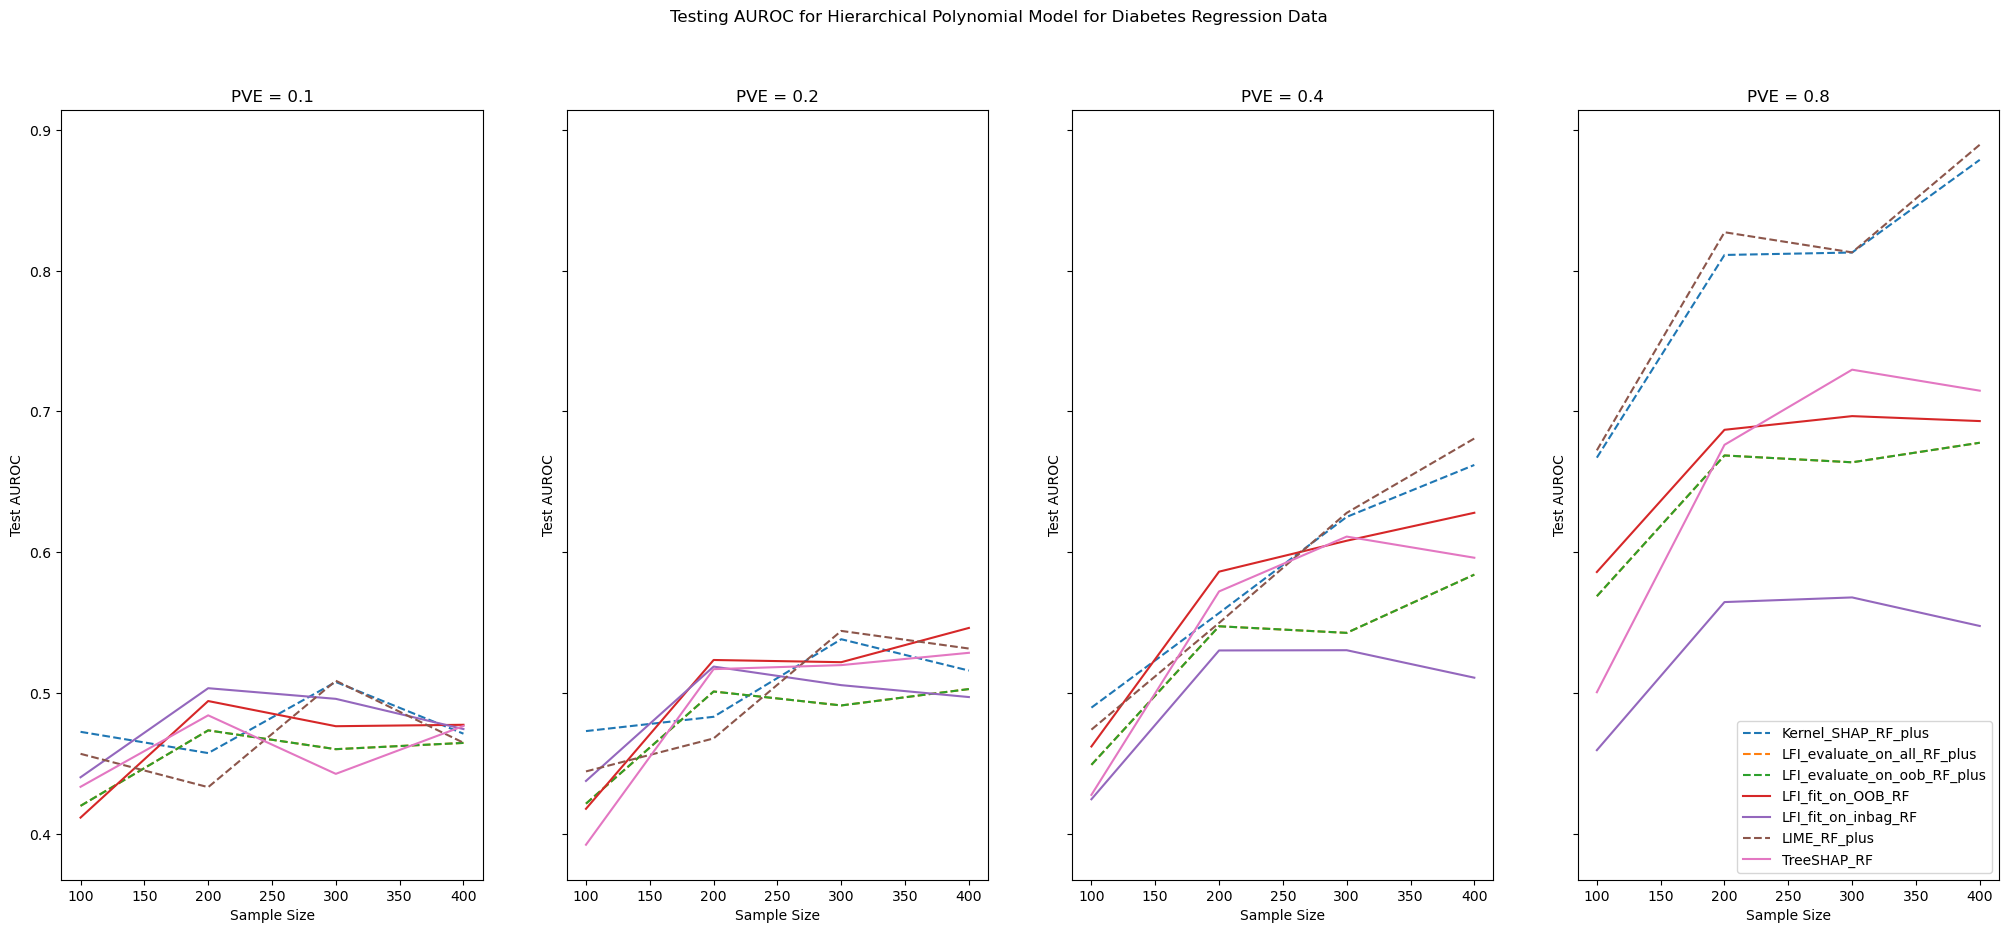

In [68]:
# Create subplots
fig, axs = plt.subplots(1, 4, figsize=(25, 10), sharey=True)

for i in range(len(heritability)):
    h = heritability[i]
    for m in methods:
        if "RF_plus" in m:
            axs[i].plot(sample_row_n, agg_results[h][m]["test_auroc"], label=m, linestyle='dashed')
        else:
            axs[i].plot(sample_row_n, agg_results[h][m]["test_auroc"], label=m)
    # axs[i].plot(h, agg_results[h][m]["test_auroc"], label="m")
    axs[i].set_xlabel('Sample Size')
    axs[i].set_ylabel('Test AUROC')
    axs[i].set_title('PVE = ' + str(h))
    
# Share the label in the last plot
axs[3].legend()

fig.suptitle("Testing AUROC for Hierarchical Polynomial Model for Diabetes Regression Data")

# Show the plots
plt.show()

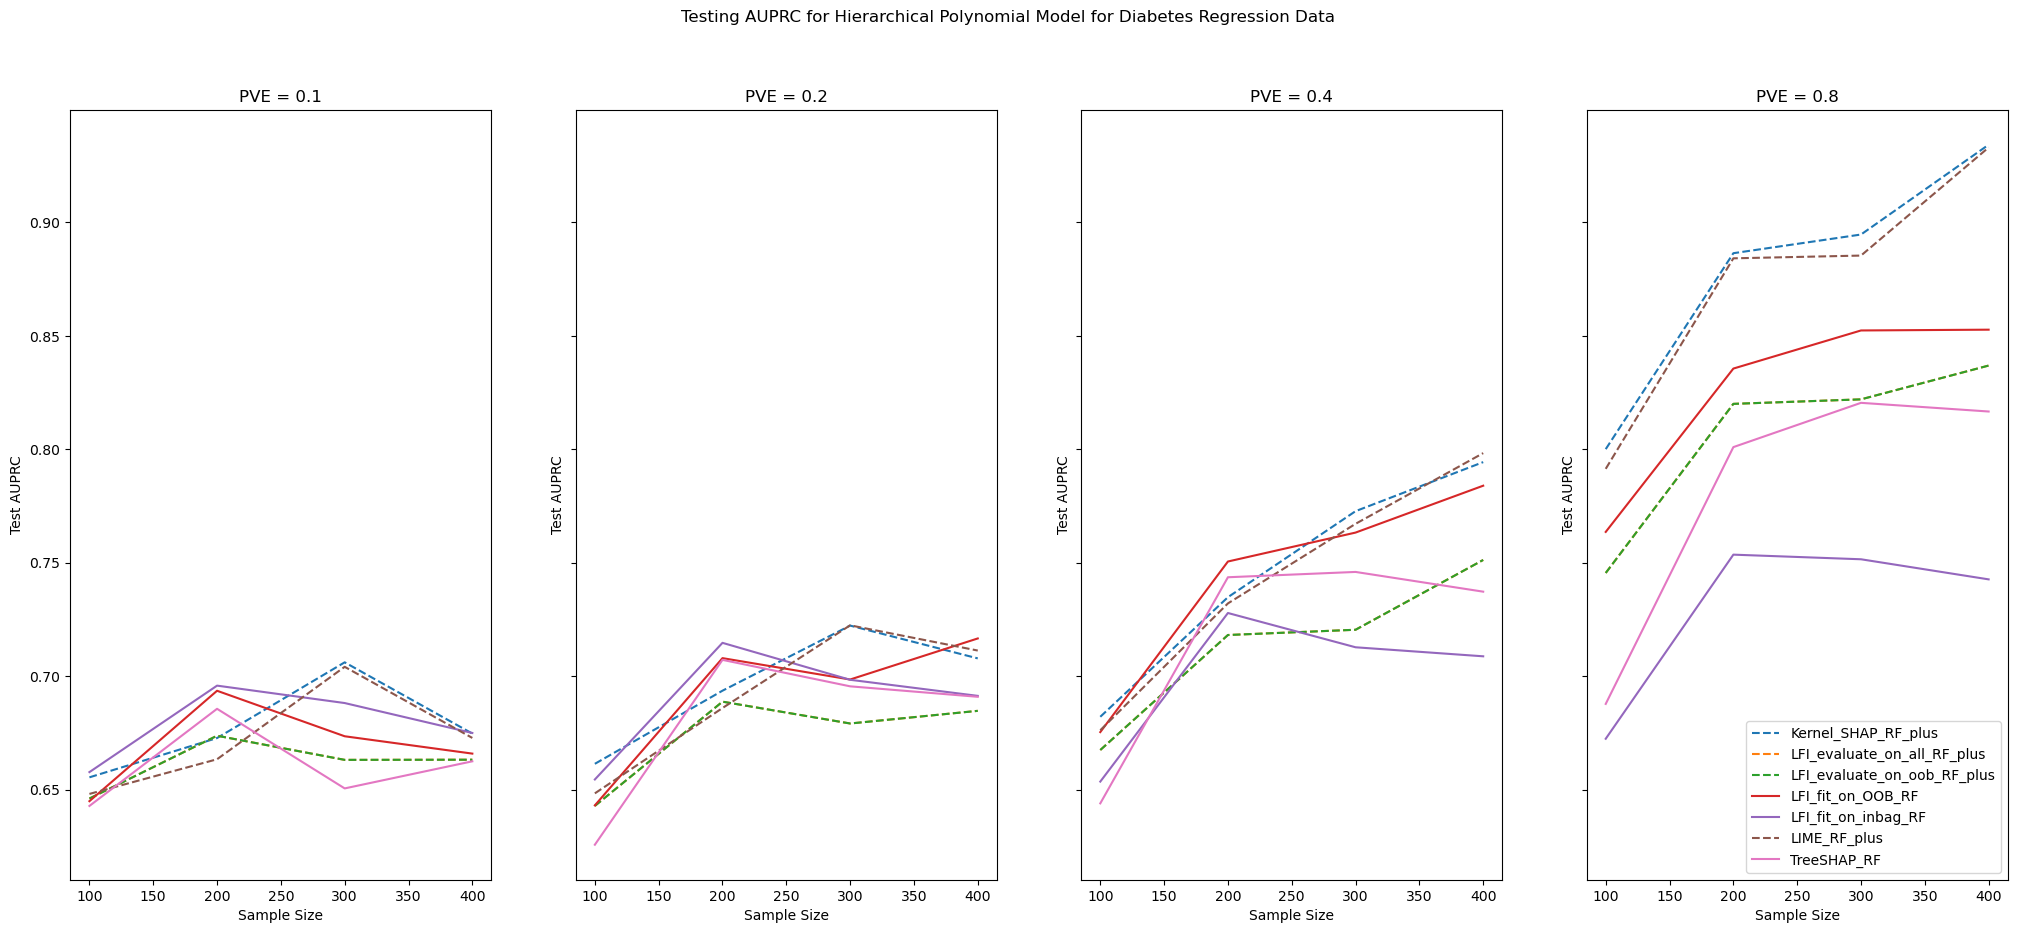

In [69]:
# Create subplots
fig, axs = plt.subplots(1, 4, figsize=(25, 10), sharey=True)

for i in range(len(heritability)):
    h = heritability[i]
    for m in methods:
        if "RF_plus" in m:
            axs[i].plot(sample_row_n, agg_results[h][m]["test_auprc"], label=m, linestyle='dashed')
        else:
            axs[i].plot(sample_row_n, agg_results[h][m]["test_auprc"], label=m)
    axs[i].set_xlabel('Sample Size')
    axs[i].set_ylabel('Test AUPRC')
    axs[i].set_title('PVE = ' + str(h))
    
# Share the label in the last plot
axs[3].legend()

fig.suptitle("Testing AUPRC for Hierarchical Polynomial Model for Diabetes Regression Data")

# Show the plots
plt.show()

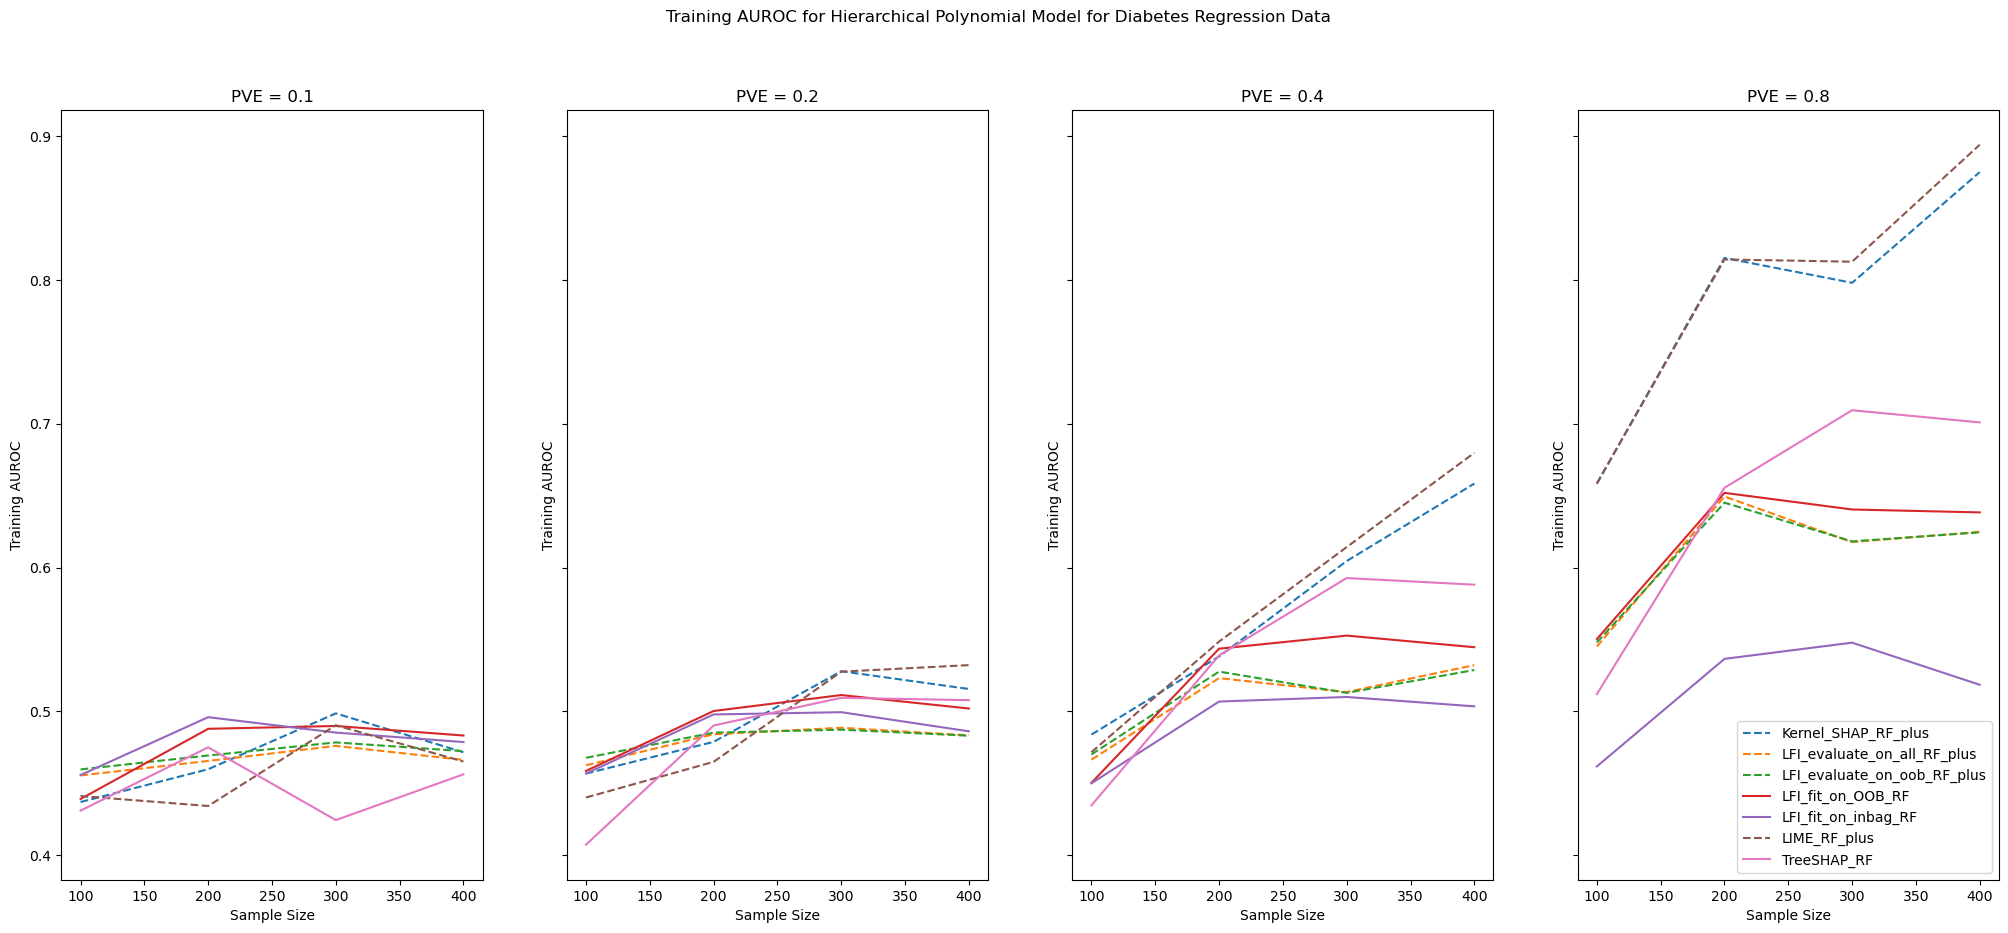

In [70]:
# Create subplots
fig, axs = plt.subplots(1, 4, figsize=(25, 10), sharey=True)

for i in range(len(heritability)):
    h = heritability[i]
    for m in methods:
        if "RF_plus" in m:
            axs[i].plot(sample_row_n, agg_results[h][m]["train_auroc"], label=m, linestyle='dashed')
        else:
            axs[i].plot(sample_row_n, agg_results[h][m]["train_auroc"], label=m)
    axs[i].set_xlabel('Sample Size')
    axs[i].set_ylabel('Training AUROC')
    axs[i].set_title('PVE = ' + str(h))
    
# Share the label in the last plot
axs[3].legend()

fig.suptitle("Training AUROC for Hierarchical Polynomial Model for Diabetes Regression Data")

# Show the plots
plt.show()

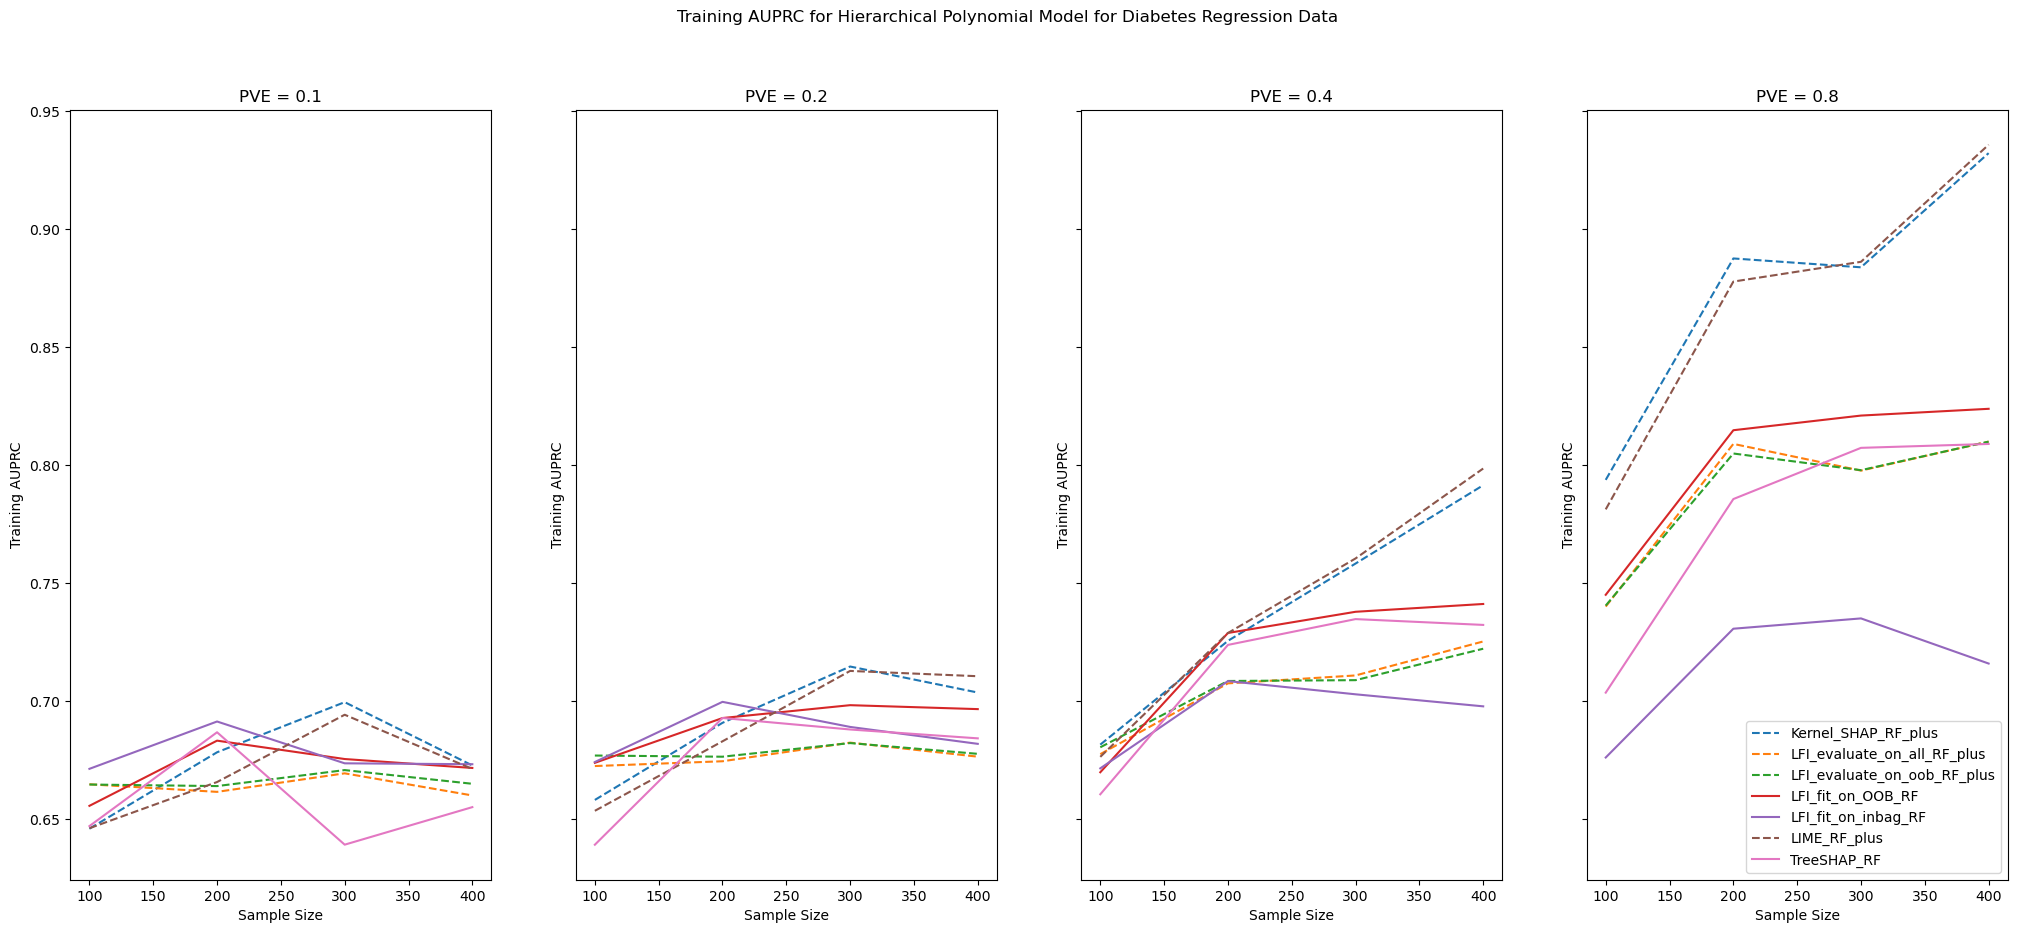

In [71]:
# Create subplots
fig, axs = plt.subplots(1, 4, figsize=(25, 10), sharey=True)

for i in range(len(heritability)):
    h = heritability[i]
    for m in methods:
        if "RF_plus" in m:
            axs[i].plot(sample_row_n, agg_results[h][m]["train_auprc"], label=m, linestyle='dashed')
        else:
            axs[i].plot(sample_row_n, agg_results[h][m]["train_auprc"], label=m)
    axs[i].set_xlabel('Sample Size')
    axs[i].set_ylabel('Training AUPRC')
    axs[i].set_title('PVE = ' + str(h))
    
# Share the label in the last plot
axs[3].legend()

fig.suptitle("Training AUPRC for Hierarchical Polynomial Model for Diabetes Regression Data")

# Show the plots
plt.show()